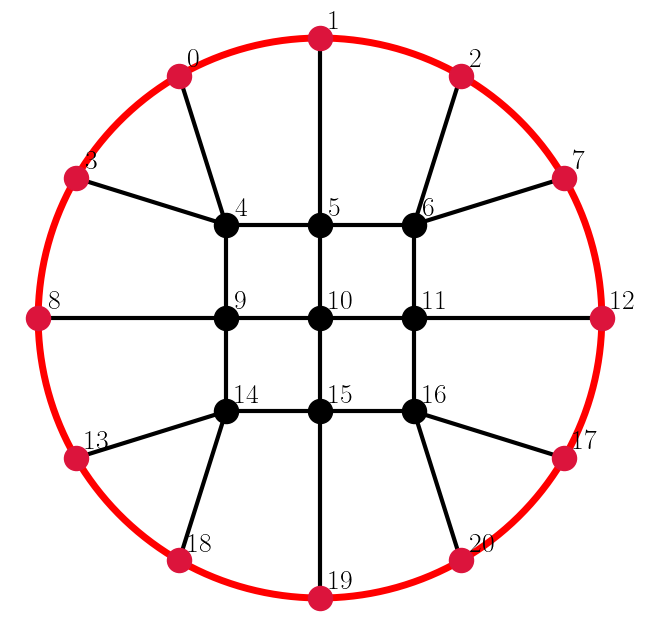

In [1]:
from spring_helpers import SpringSystem, save_animation
from data_utils import bmatrix

import matplotlib.pyplot as plt
import numpy as np
import matplotlib

def final_report(res):
    sstemp = SpringSystem()
    theta,pos = sstemp.vec_to_pos(res['trace']['x'][-1])
    np.set_printoptions(suppress=True)
    rounded_array = np.around(pos.T, decimals=3)
    pretty_array = np.array2string(rounded_array, separator=', ')
    print('Positions:')
    print(pretty_array)

    rounded_array = np.around(theta, decimals=3)
    pretty_array = np.array2string(rounded_array, separator=', ')
    print('Thetas:')
    print(pretty_array)

    rounded_array = np.around(res['trace']['f'][-1], decimals=3)
    pretty_array = np.array2string(rounded_array, separator=', ')
    print('Resulting energy:')
    print(pretty_array)

    rounded_array = np.around(res['trace']['grad_norm'][-1], decimals=3)
    pretty_array = np.array2string(rounded_array, separator=', ')
    print('Gradient norm:')
    print(pretty_array)
    np.set_printoptions(suppress=False)
    
def plot_iteration(res):

    iters = res['trace']['iter']
    f = res['trace']['f']
    grad_norm = res['trace']['grad_norm']
    plt.rc('text', usetex=True)
    plt.rcParams.update({'font.size': 24})
    # matplotlib.use('TkAgg')
    fig, ax = plt.subplots(figsize = [12,6])
    plt.rc('font', family='serif')
    # fig, ax = plt.subplots(figsize = [7,5])

    fig.subplots_adjust(left=0.2,right=0.8)
    ax1 = ax.twinx()
    p1, = ax.plot(iters,f,c='b',label = r'$E(x_i)$')
    p2, = ax1.plot(iters,grad_norm,c='g',label = r'$|\nabla E(x_i)|$')
    ax.tick_params(axis='y', colors=p1.get_color())
    ax1.tick_params(axis='y', colors=p2.get_color())
    ax.set_ylim(np.floor(np.min(f)),np.ceil(np.max(f))) 
    ax1.set_ylim(np.floor(np.min(grad_norm)),np.ceil(np.max(grad_norm)))
    ax.set_xlabel('$i$', fontfamily = 'times')
    plt.legend(handles=[p1,p2])
    plt.show()
    return fig

ss = SpringSystem()

ss.draw_spring_system()

In [2]:
from optimization import BFGS,ADAM,TraceCallback

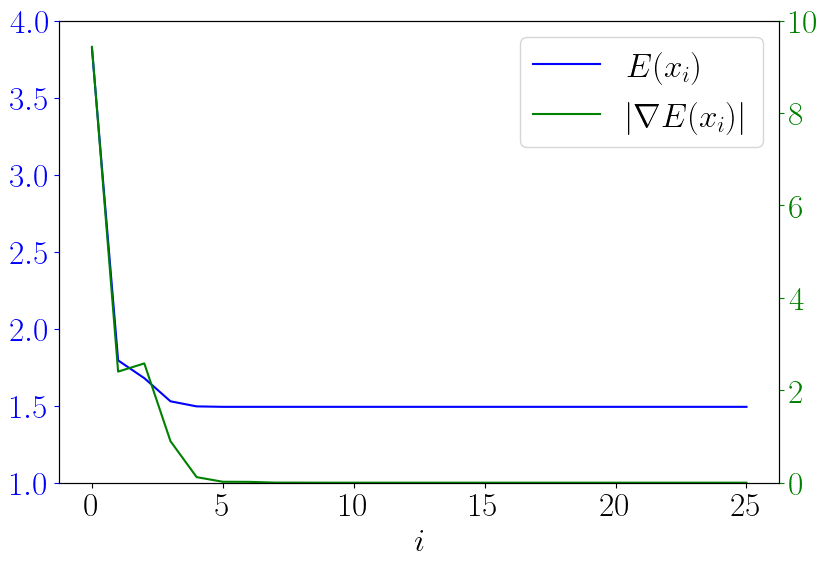

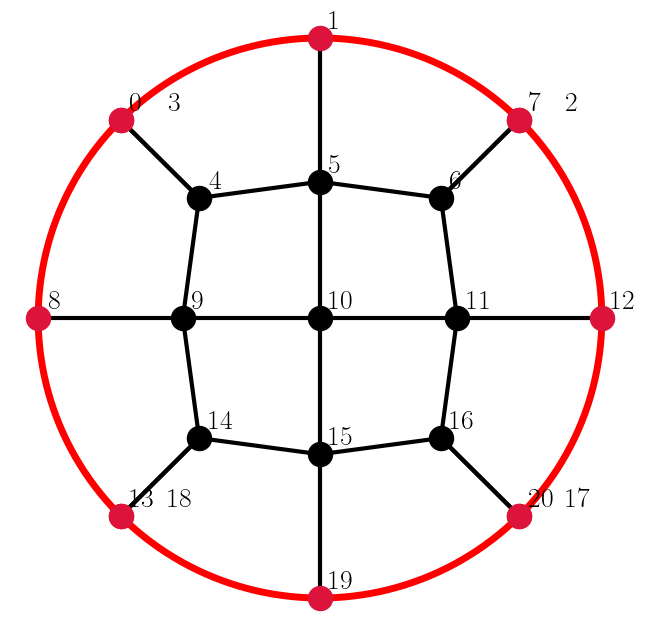

In [3]:
opt = BFGS(maxiter=25,callback=TraceCallback())
ss = SpringSystem()
res = opt.minimize(fun=ss.func,x0=ss.vec,jac=ss.gradient)
ss.update(res['x'])
fig2a=plot_iteration(res)
fig2c=ss.draw_spring_system(return_fig=True)
fig2a.savefig('./figures/fig2a.svg', transparent=True)
fig2c.savefig('./figures/fig2c.svg', transparent=True)

In [4]:
final_report(res)

Positions:
[[-2.121,  0.   ,  2.121, -2.121, -1.286, -0.   ,  1.286,  2.121, -3.   ,
  -1.46 ,  0.   ,  1.46 ,  3.   , -2.121, -1.286, -0.   ,  1.286,  2.121,
  -2.121,  0.   ,  2.121],
 [ 2.121,  3.   ,  2.121,  2.121,  1.286,  1.46 ,  1.286,  2.121, -0.   ,
   0.   , -0.   ,  0.   , -0.   , -2.121, -1.286, -1.46 , -1.286, -2.121,
  -2.121, -3.   , -2.121]]
Thetas:
[2.356, 2.356, 3.142, 3.927, 3.927, 4.712, 5.498, 5.498, 6.283, 7.069,
 7.069, 7.854]
Resulting energy:
1.492
Gradient norm:
0.


In [5]:
save_animation(res,'./bfgs_spring_system.gif',duration=100.0)

![EEE](bfgs_spring_system.gif "EEE")


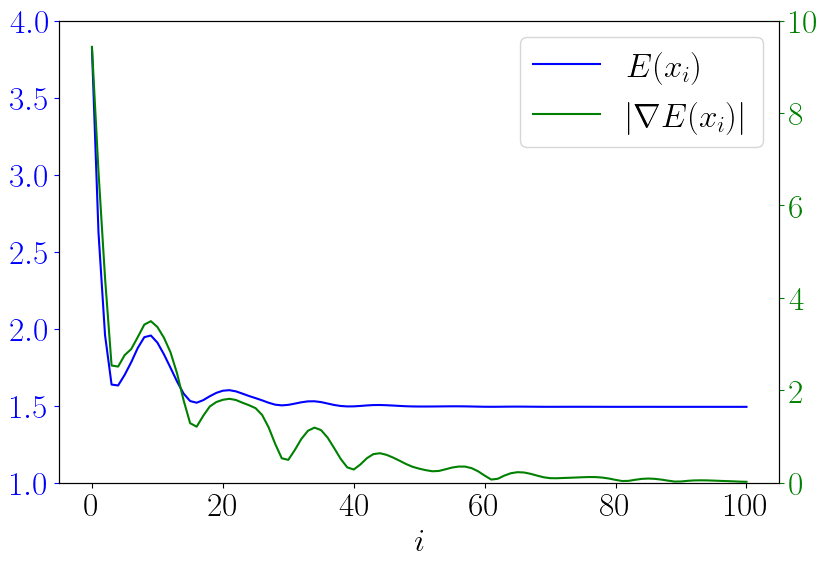

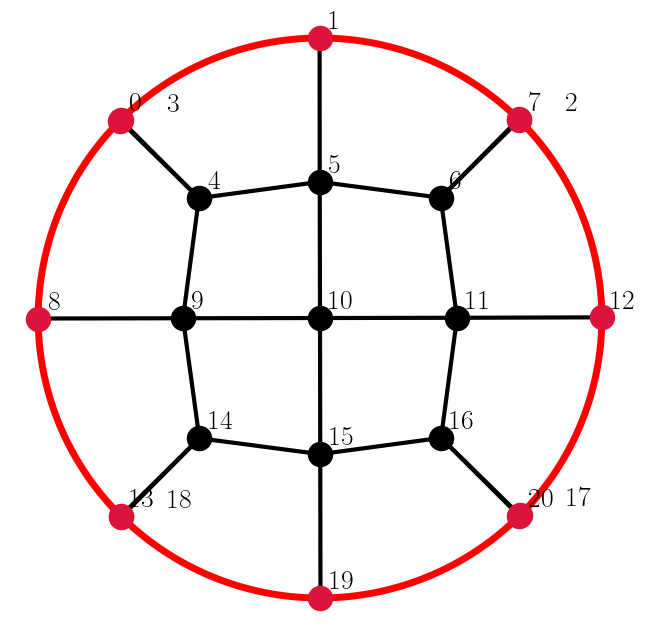

In [6]:
opt = ADAM(a=.1,maxiter=100,callback=TraceCallback())
ss = SpringSystem()
res = opt.minimize(fun=ss.func,x0=ss.vec,jac=ss.gradient)
ss.update(res['x'])
fig2b = plot_iteration(res)
fig2d =ss.draw_spring_system(return_fig=True)
fig2b.savefig('./figures/fig2b.svg', transparent=True)
fig2d.savefig('./figures/fig2d.svg', transparent=True)

In [7]:
final_report(res)

Positions:
[[-2.121, -0.004,  2.113, -2.129, -1.289, -0.003,  1.285,  2.122, -3.   ,
  -1.459, -0.   ,  1.459,  3.   , -2.121, -1.285,  0.002,  1.289,  2.129,
  -2.113,  0.005,  2.121],
 [ 2.121,  3.   ,  2.129,  2.113,  1.285,  1.459,  1.289,  2.121, -0.005,
  -0.003, -0.   ,  0.003,  0.006, -2.121, -1.289, -1.459, -1.285, -2.113,
  -2.129, -3.   , -2.121]]
Thetas:
[2.356, 2.36 , 3.143, 3.927, 3.931, 4.714, 5.498, 5.502, 6.285, 7.068,
 7.072, 7.855]
Resulting energy:
1.492
Gradient norm:
0.019


In [8]:
save_animation(res,'./adam_spring_system.gif',duration=50.0)

![EEE](adam_spring_system.gif "EEE")